## PYTHON JOURNEY MACHINE & DEEP LEARNING
### Trabalho prático usando Python
 
### Árvore de Decisão - Modelo de Inadimplência PF

### Segmento Cartão de Crédito

### A área de crédito deseja  avaliar  a propensão ao risco  de seus clientes e implementar políticas de redução da inadimplência 

### Dicionário de variáveis

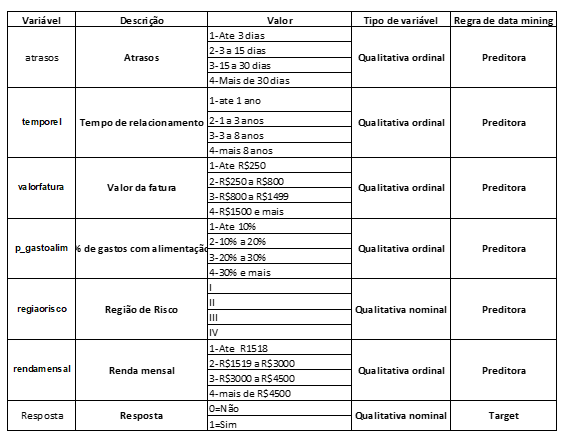

In [2]:
# Importar as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Importar os dados
df = pd.read_csv(r'C:\Users\lucas\Downloads\trab5_solucao\arq_inadimplencia.csv', ";")

In [4]:
df.head()

,cliente,atrasos,Resposta,temporel,valorfatura,p_gastoalim,regiaorisco,rendamensal
0,1,4,1,2,4,4,2,4
1,2,1,0,4,1,1,3,3
2,3,1,0,4,3,2,2,2
3,4,2,1,2,4,4,1,3
4,5,2,0,1,4,1,2,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25984 entries, 0 to 25983
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   cliente      25984 non-null  int64
 1   atrasos      25984 non-null  int64
 2   Resposta     25984 non-null  int64
 3   temporel     25984 non-null  int64
 4   valorfatura  25984 non-null  int64
 5   p_gastoalim  25984 non-null  int64
 6   regiaorisco  25984 non-null  int64
 7   rendamensal  25984 non-null  int64
dtypes: int64(8)
memory usage: 1.6 MB


In [6]:
# Mudar o formato da variável resposta para qualitativa
df['Resposta'] = df['Resposta'].astype(str)
df['atrasos'] = df['atrasos'].astype(str)
df['temporel'] = df['temporel'].astype(str)
df['valorfatura'] = df['valorfatura'].astype(str)
df['p_gastoalim'] = df['p_gastoalim'].astype(str)
df['rendamensal'] = df['rendamensal'].astype(str)
df['regiaorisco'] = df['regiaorisco'].astype(str)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25984 entries, 0 to 25983
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   cliente      25984 non-null  int64 
 1   atrasos      25984 non-null  object
 2   Resposta     25984 non-null  object
 3   temporel     25984 non-null  object
 4   valorfatura  25984 non-null  object
 5   p_gastoalim  25984 non-null  object
 6   regiaorisco  25984 non-null  object
 7   rendamensal  25984 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.6+ MB


In [8]:
# Selecionar as variáveis de análises
var_cat =['atrasos','Resposta','temporel', 'valorfatura','p_gastoalim','regiaorisco','rendamensal']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

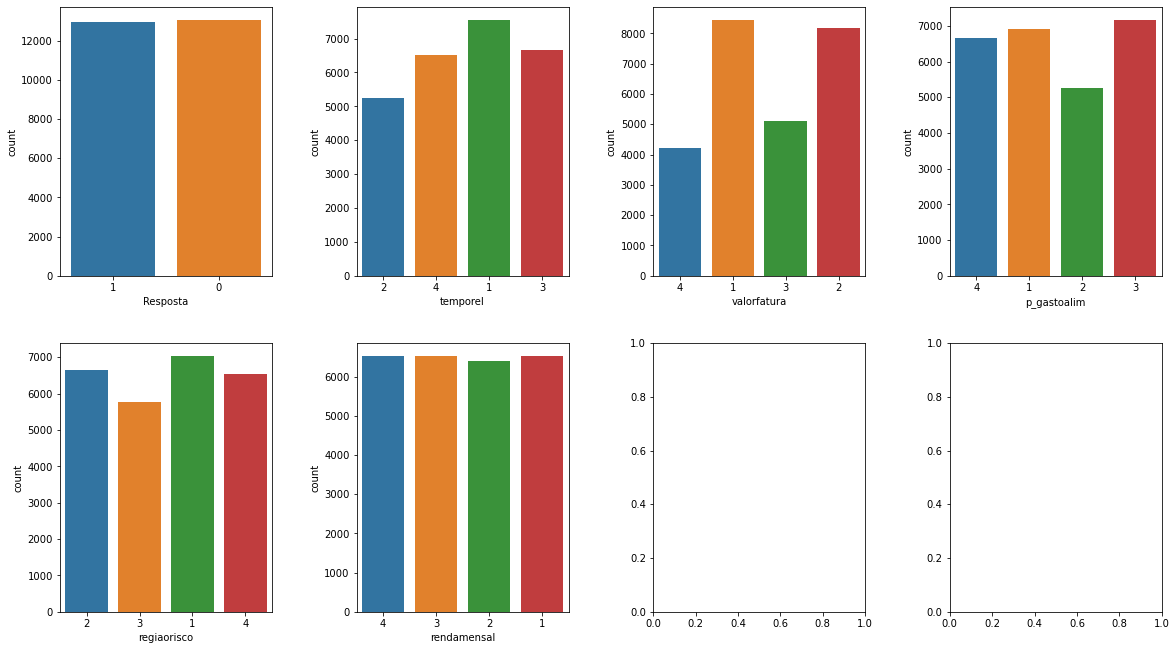

In [9]:
# Análise das variáveis qualitativas
features = var_cat
fig,axs=plt.subplots(nrows=2, ncols=4, figsize=(18,10))
for col, ax in zip(features[1:], axs.ravel()):
    x=df.loc[:, col]
    sns.countplot(x, ax=ax, orient='v')
    plt.subplots_adjust(top=0.92,bottom=0.08, left=0.10,right=0.95,hspace=0.25,wspace=0.4)

In [10]:
# Tabela de frequência da variável Resposta do modelo
Resposta =pd.pivot_table(df, index='Resposta', values='cliente', aggfunc=np.count_nonzero)
Resposta['%'] = ((pd.pivot_table(df, index='Resposta', values = 'cliente', aggfunc=np.count_nonzero)/df['cliente'].count())*100).round(2)

In [11]:
Resposta

,cliente,%
Resposta,,
0,13056,50.25
1,12928,49.75


In [12]:
# Importar a biblioteca para partição das amostras em treino e validação
from sklearn.model_selection import train_test_split

In [13]:
# Dividir a amostra treino e teste
X = df.drop(['cliente', 'Resposta'],axis=1)
y = df['Resposta']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [14]:
# Ver os tipos de variáveis preditoras ou covariáveis
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25984 entries, 0 to 25983
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   atrasos      25984 non-null  object
 1   temporel     25984 non-null  object
 2   valorfatura  25984 non-null  object
 3   p_gastoalim  25984 non-null  object
 4   regiaorisco  25984 non-null  object
 5   rendamensal  25984 non-null  object
dtypes: object(6)
memory usage: 1.2+ MB


In [15]:
# Descritiva da variável resposta
y_train.describe()

count     18188
unique        2
top           0
freq       9115
Name: Resposta, dtype: object

In [16]:
# Ver os tipos de variáveis preditoras ou covariáveis na amostra treino
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18188 entries, 11081 to 13151
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   atrasos      18188 non-null  object
 1   temporel     18188 non-null  object
 2   valorfatura  18188 non-null  object
 3   p_gastoalim  18188 non-null  object
 4   regiaorisco  18188 non-null  object
 5   rendamensal  18188 non-null  object
dtypes: object(6)
memory usage: 994.7+ KB


In [17]:
# Importar a biblioteca da Árvore de Decisão
from sklearn.tree import DecisionTreeClassifier

In [18]:
# Construir a árvore
dtree = DecisionTreeClassifier()

In [19]:
# Ajustar a árvore aos dados da amostra treino
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

### Predição da Árvore de Decisão

In [20]:
predictions = dtree.predict(X_train)

### Avaliação do acerto da Árvore de Classificação

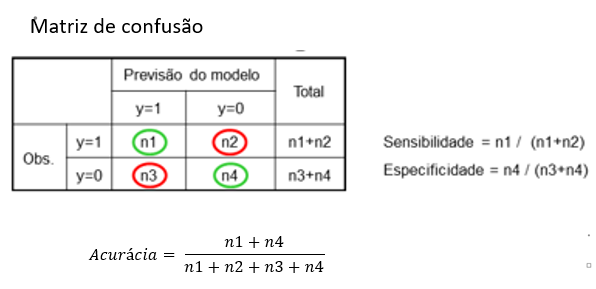

### Precision score = n4/(n3+n4)
### Recall score = n4/(n2+n4)
### F1 Score = 2* Precision Score * Recall Score/ (Precision Score + Recall Score)

link: https://vitalflux.com/accuracy-precision-recall-f1-score-python-example/

In [21]:
# Importar a biblioteca da Matriz de classificação do modelo
from sklearn.metrics import classification_report,confusion_matrix

In [22]:
# Print da Matriz de classificação do modelo
print(classification_report(y_train,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9115
           1       0.99      0.99      0.99      9073

    accuracy                           0.99     18188
   macro avg       0.99      0.99      0.99     18188
weighted avg       0.99      0.99      0.99     18188



In [23]:
# Importar as bibliotecas que mostram a Árvore de Decisão
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree


In [24]:
# Label das variáveis preditoras ou covariáveis
labels = ['atrasos', 'temporel', 'valorfatura', 'p_gastoalim', 'regiaorisco', 'rendamensal'] # 0 é maçã e 1 é laranja

In [25]:
# Construir a Árvore de Decisão
clf = tree.DecisionTreeClassifier(random_state=0, max_depth = 2) # instância do classificador
clf = clf.fit(X_train, y_train) 


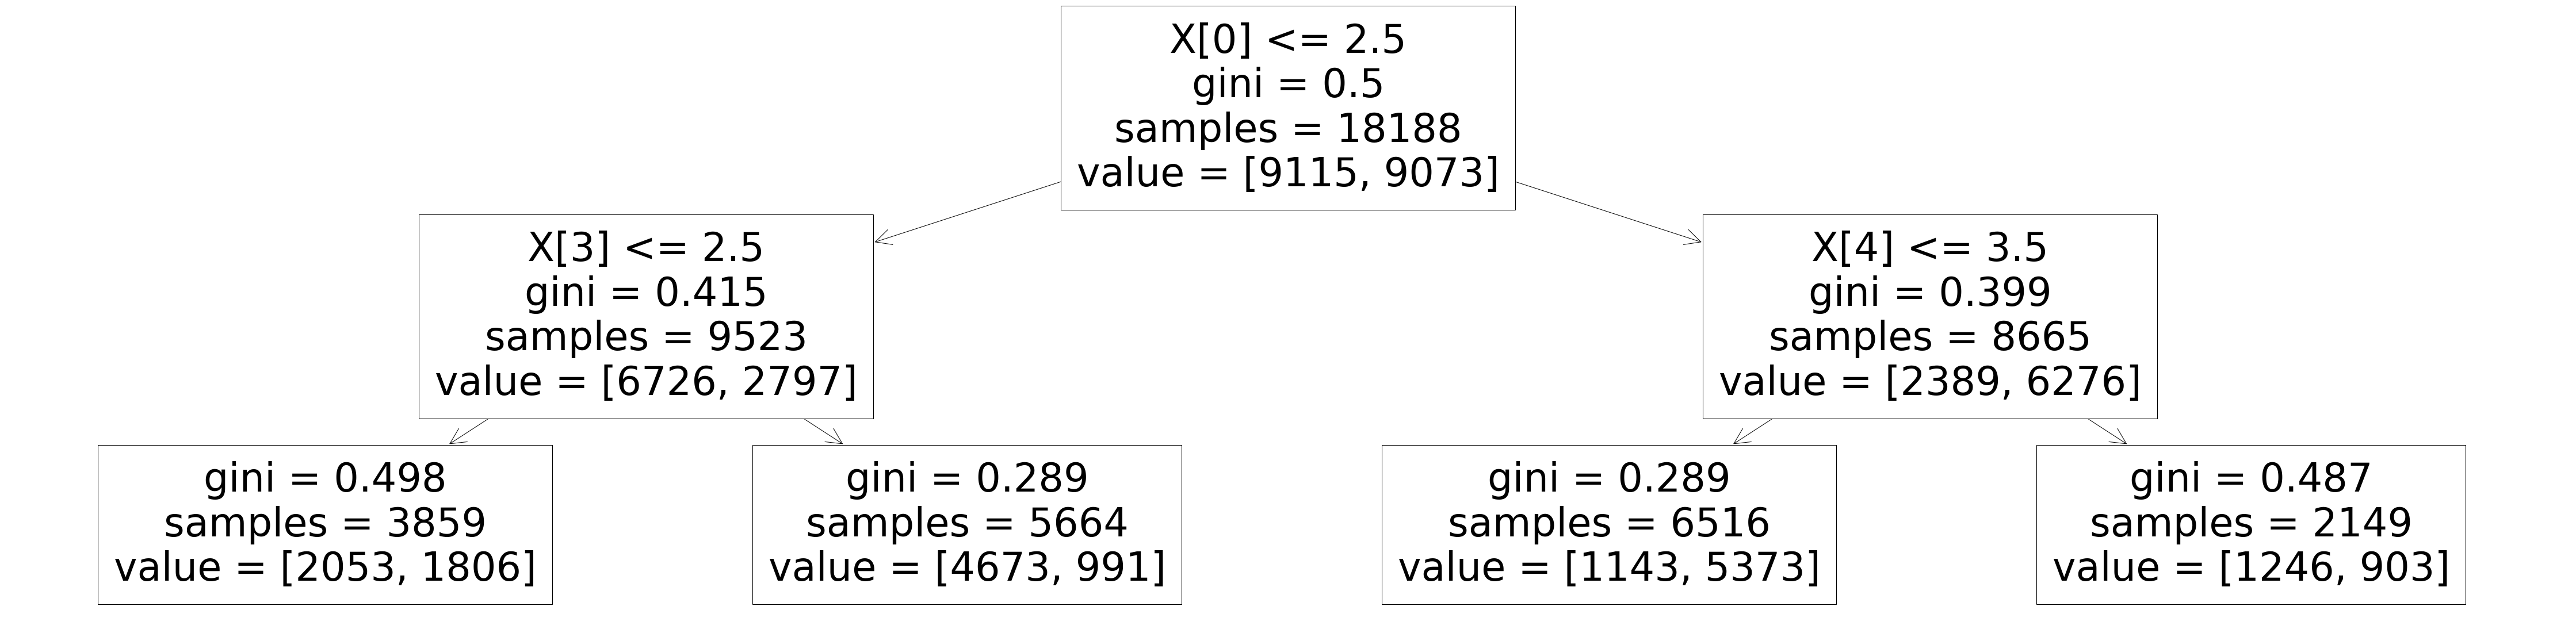

In [26]:
# Plotar a Árvore de Decisão
plt.figure(figsize = (80,20))
plot_tree(clf) 
plt.show()

### Amostra teste

In [27]:
# Aplicação dá Árvore de Decisão construída na amostra treino na amostra de validação

clf_teste = clf.fit(X_test, y_test) 

In [28]:
# Predição do modelo
predictions_test = dtree.predict(X_test)

In [29]:
# Print da Matriz de classificação do modelo na amostra validação

print(classification_report(y_test,predictions_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3941
           1       0.99      0.99      0.99      3855

    accuracy                           0.99      7796
   macro avg       0.99      0.99      0.99      7796
weighted avg       0.99      0.99      0.99      7796

